# 6.5 Unsupervised Machine Learning Clustering

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Drop columns
#### 3. Elbow technique
#### 4. k-means clustering

### 1. Importing libraries and data

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # (k-means algorithm)
import pylab as pl # (bulk import matplotlib)

In [128]:
# Prompt matplotlib visuals to appear in the notebook

%matplotlib inline

In [129]:
# Define path

path = r'C:\Users\Mark\_Electric Power Plant Emissions'

In [130]:
# Import the "emissions" data

df = pd.read_pickle(os.path.join(path, '03 Scripts', 'Prepared Data', 'emissions2016-2019-clean-el.pkl'))

In [131]:
# Review the first few rows of the main dataframe

df.head()

,Plant Code,Year,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),...,Fuel Use(useful thermal output MMBtu),Fuel Consumed Qty,Fuel Units,Tons of CO2 Emissions,CO2 Emissions Metric Tonnes,NERC Region,Balancing Authority Code,Balancing Authority Name,EIA Balancing Authority Region,Emission Levels
0,3,2016,Barry,AL,Electric Power,1,CA,NG,GAS,2918277000,...,0,878457,Mcf,52374,47513,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,low
1,3,2016,Barry,AL,Electric Power,1,CT,NG,GAS,5483083000,...,0,56694492,Mcf,3380728,3066976,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,high
2,3,2016,Barry,AL,Electric Power,1,ST,BIT,COAL,4278313064,...,0,2044002,Tons,4436536,4024799,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,high
3,3,2016,Barry,AL,Electric Power,1,ST,NG,GAS,91217936,...,0,908006,Mcf,54172,49144,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,low
4,7,2016,Gadsden,AL,Electric Power,1,ST,NG,GAS,190978000,...,404532,2570783,Mcf,152816,138633,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,low


In [132]:
# Round all nnumbers to zero decimal places

pd.options.display.float_format = '{:.0f}'.format

In [133]:
# Check number of rows and columns

df.shape

(21480, 23)

### 2. Drop columns

In [134]:
# Check data types to see for non-numeric columns

df.dtypes

Plant Code                                 int64
Year                                       int64
Plant Name                                object
State                                     object
Sector Group                              object
Sector Code                                int64
Prime Mover                               object
Fuel Code                                 object
Aggregated Fuel Group                     object
Generation (kWh)                           int64
Useful Thermal Output (MMBtu)              int64
Total Fuel Use (MMBtu)                     int64
Fuel Use(generate electric MMBtu)          int64
Fuel Use(useful thermal output MMBtu)      int64
Fuel Consumed Qty                          int64
Fuel Units                                object
Tons of CO2 Emissions                    float64
CO2 Emissions Metric Tonnes              float64
NERC Region                               object
Balancing Authority Code                  object
Balancing Authority 

In [135]:
# Drop the non-numeric columns

notnumeric = ['Plant Name', 'State', 'Sector Group', 'Prime Mover', 'Fuel Code', 'Aggregated Fuel Group', 
              'Fuel Units', 'NERC Region', 'Balancing Authority Code', 'Balancing Authority Name', 
              'EIA Balancing Authority Region', 'Emission Levels']

df = df.drop([x for x in notnumeric if x in df.columns], axis=1)

In [136]:
# Review the first few rows of the dataframe

df.head()

,Plant Code,Year,Sector Code,Generation (kWh),Useful Thermal Output (MMBtu),Total Fuel Use (MMBtu),Fuel Use(generate electric MMBtu),Fuel Use(useful thermal output MMBtu),Fuel Consumed Qty,Tons of CO2 Emissions,CO2 Emissions Metric Tonnes
0,3,2016,1,2918277000,0,895285,895285,0,878457,52374,47513
1,3,2016,1,5483083000,0,57790622,57790622,0,56694492,3380728,3066976
2,3,2016,1,4278313064,0,43137858,43137858,0,2044002,4436536,4024799
3,3,2016,1,91217936,0,926020,926020,0,908006,54172,49144
4,7,2016,1,190978000,133494,2612250,2207718,404532,2570783,152816,138633


In [137]:
# Review the basic statistics

df.describe()

,Plant Code,Year,Sector Code,Generation (kWh),Useful Thermal Output (MMBtu),Total Fuel Use (MMBtu),Fuel Use(generate electric MMBtu),Fuel Use(useful thermal output MMBtu),Fuel Consumed Qty,Tons of CO2 Emissions,CO2 Emissions Metric Tonnes
count,21480,21480,21480,21480,21480,21480,21480,21480,21480,21480,21480
mean,27835,2017,2,488884318,193723,4654609,4374394,297004,2335418,378564,343431
std,25986,1,2,1414901958,995332,14415590,14280580,1467421,7529201,1375309,1247673
min,1,2016,1,-2255286984,0,0,0,0,0,0,0
25%,2906,2016,1,336904,0,3016,2295,0,581,220,200
50%,10339,2017,2,12526500,0,122647,80912,0,46785,7574,6870
75%,55230,2018,3,199568577,0,1666965,1096945,0,909223,103694,94071
max,99999,2019,7,18792035555,19980020,189369706,189369706,27592045,146219399,20030555,18171601


In the statistics above and from previous analysis, we see that there are 7 sector codes within the 3 sector groups "Electric Power" (1, 2, 3), Commercial (4, 5), Industrial (6, 7). It is clear that sector codes 1, 2, and 3 dominate all other sectors. This factor tends to pull the means well above the other sector's means in virtually all relevant variables.

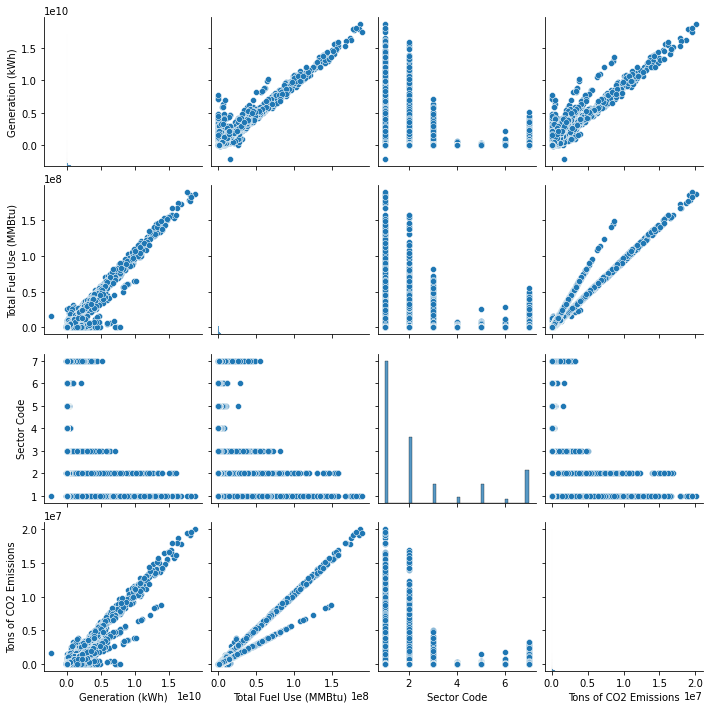

In [138]:
# Review some of the comparisons between the different variables

sns.pairplot(df[['Generation (kWh)', 'Total Fuel Use (MMBtu)', 'Sector Code', 'Tons of CO2 Emissions']])

### 3. Elbow technique

In [139]:
# Range of potential clusters in the data
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

Initially, I chose a cluster range of 1-3 since previous basic statistics and the seaborn categorical plot seemed to indicate substantial differences between the 3 sector groups. However, k-means produced a diagnally straight line and not the desired elbow shape. At a range of 1-7, the line did not flatten enough, and was still trending upward. Finally a range of 1-10 produced a breaking point at around 3 clusters when it began flattening out. 

In [140]:
# A score that represents the rate of variation for the given cluster option

score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score

[-4.301003451010334e+22,
 -1.4378553564339372e+22,
 -6.334885397406425e+21,
 -3.6076813457501764e+21,
 -2.342931067071206e+21,
 -1.5562732482026755e+21,
 -1.202771682305752e+21,
 -9.001799353293111e+20,
 -7.253474918647537e+20]

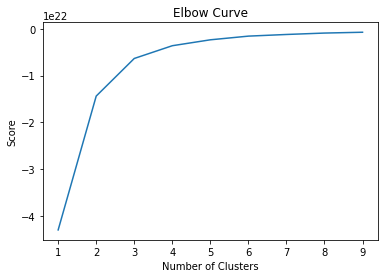

In [141]:
# Elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. k-means clustering

In [142]:
# k-means object

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [143]:
# Fit the k-means object to the data

kmeans.fit(df)

C:\Users\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [144]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [145]:
df.head()

,Plant Code,Year,Sector Code,Generation (kWh),Useful Thermal Output (MMBtu),Total Fuel Use (MMBtu),Fuel Use(generate electric MMBtu),Fuel Use(useful thermal output MMBtu),Fuel Consumed Qty,Tons of CO2 Emissions,CO2 Emissions Metric Tonnes,clusters
0,3,2016,1,2918277000,0,895285,895285,0,878457,52374,47513,2
1,3,2016,1,5483083000,0,57790622,57790622,0,56694492,3380728,3066976,2
2,3,2016,1,4278313064,0,43137858,43137858,0,2044002,4436536,4024799,2
3,3,2016,1,91217936,0,926020,926020,0,908006,54172,49144,0
4,7,2016,1,190978000,133494,2612250,2207718,404532,2570783,152816,138633,0


In [146]:
df['clusters'].value_counts()

0    19323
2     1842
1      315
Name: clusters, dtype: int64

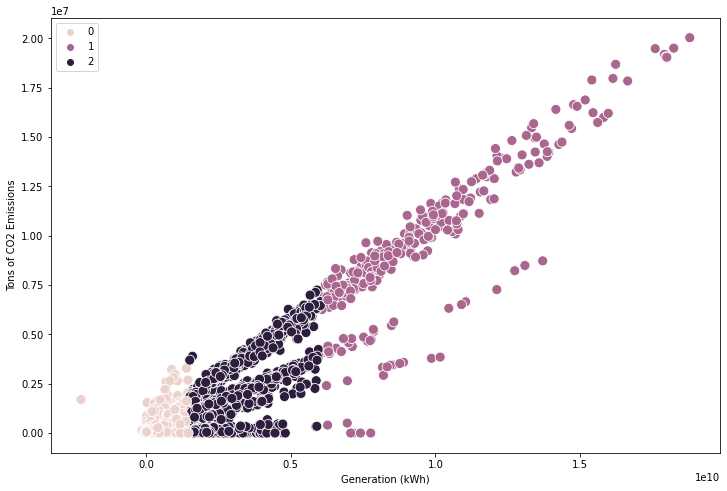

In [154]:
# Plot the clusters for the "Tons of CO2 Emissions" and "Generation (kWh)" variables

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df['Generation (kWh)'], y=df['Tons of CO2 Emissions'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Generation (kWh)')
plt.ylabel('Tons of CO2 Emissions')
plt.show()

In the scatterplot above, we see the first cluster, in salmon pink, coded as "0" in the legend, is the least populated cluster. It gathers the data points with low power generation and relatively low CO2 emissions (with the exclusion of one extreme data point below zero). 

The second cluster, in black, coded as "2" in the legend, includes points with higher power generation and distinctively "high", "medium", and "low" CO2 emissions. 

The third cluster, in purple, coded as "1" in the legend, contains the points with the highest power generation and by far the highest CO2 emissions, and also having distinctively "extremely high", "high", "medium", and "low" CO2 emissions. The high, medium, and low data points are far few than in the second cluster, but the "extremely high" group much higher than all others.

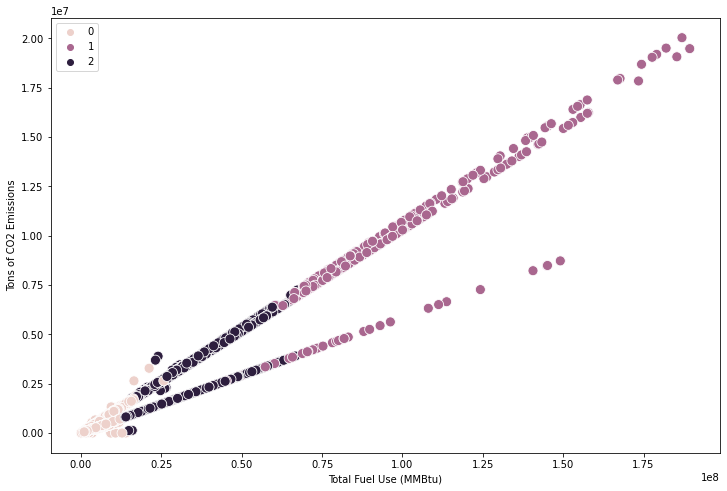

In [148]:
# Plot the clusters for the "Tons of CO2 Emissions" and "Total Fuel Use (MMBtu)" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Fuel Use (MMBtu)'], y=df['Tons of CO2 Emissions'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total Fuel Use (MMBtu)') 
plt.ylabel('Tons of CO2 Emissions') 
plt.show()

In [151]:
df.loc[df['clusters'] == 2, 'cluster'] = 'black'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [152]:
df.groupby('cluster').agg({'Generation (kWh)':['mean', 'median'], 
                         'Tons of CO2 Emissions':['mean', 'median'], 
                         'Total Fuel Use (MMBtu)':['mean', 'median'],
                          'Tons of CO2 Emissions':['mean', 'median']})

Generation (kWh)             Tons of CO2 Emissions          \
                    mean      median                  mean  median   
cluster                                                              
black         2788089273  2447004000               1945042 1651700   
pink           126264662     7286190                 83468    4392   
purple        9288135385  8420643096               9320418 8725639   

        Total Fuel Use (MMBtu)           
                          mean   median  
cluster                                  
black                 25469659 24596480  
pink                   1220798    70612  
purple                93575893 85266332